In [23]:

# import scipy.linalg as scl

%matplotlib notebook
%pylab
%matplotlib qt

#from matplotlib.animation import FuncAnimation,Writers
from matplotlib.animation import FuncAnimation
#from IPython.display import HTML
import scipy.linalg as scl
#plt.style.use (['notebook'])
#import matplotlib.pyplot as plt
import numpy as np

#from IPython import display


Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [24]:
a=1.65
b=4
Nx=100
#dx=((b-a)/Nx)
x=np.linspace(a,b,Nx+1)
dx=x[1]-x[0]
#dx = 0.025 #  If you considered this one, you are going to have good value for the Energies near to the analytical parceque le vrai dx c'est ceci 0.02400000000000002
H=dx**2
#compute the second derirative and add minus
A=np.zeros((Nx-2,Nx-2))
for i in range(Nx-2):
    for j in range(Nx-2):
        if i==j:
            A[i,j]=-2
        elif i==j+1:
            A[i,j]=1
        elif i+1==j:
            A[i,j]=1
        
############### NEW PARAMETEERS #######################

alpha=2.447# in 1/A
#alpha=2.33# in 1/A
h_bar=1.9e5 #in KJ.A.mol-1.c-2

##################################################
######################## When we use aug-ccpVQZ as Basis set ##########################

m=3.36e11# in kj.mol.c^2 (is a reduced mas) (I multiplied by the inverse of the Avogadro constante A )
De=7.772 #in Kj/mol
re=1.965#in A

##############  Construct the Potential ###############
T=-(((h_bar)**2)/(2*m*H))*A
K = 1 
r=np.linspace(a,b,Nx-2)
z1=(r-re)
def V(r):
    return De*(np.exp(-2*alpha*z1)-2*np.exp(-alpha*z1))

B=V(r)@(np.identity(Nx-2))

VV=np.diag(V(r)) 


Hami=(T+VV)
# print(Hami)
np.linalg.det(Hami)
eigenvalues, eigenvectors = np.linalg.eig(Hami)
E=eigenvalues
W=eigenvectors.T  #we use T as a transpose here which is a kind of normalization in analytical resolution


<IPython.core.display.Javascript object>


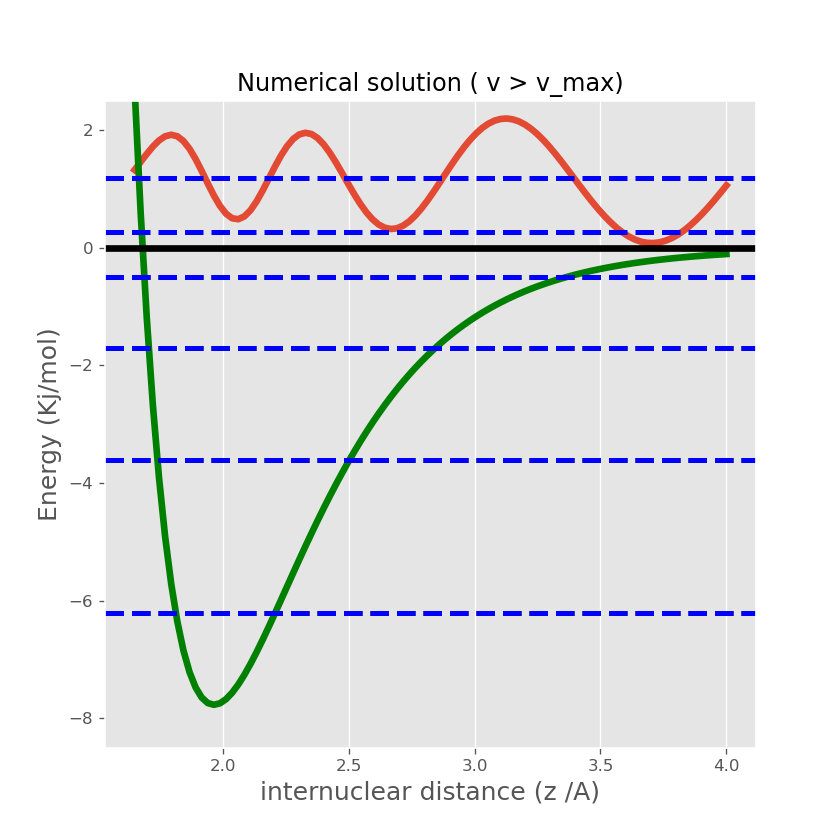

In [38]:
fig, ax = plt.subplots(figsize=(7,7))
rr=np.linspace(a,b,Nx-2) 

clf()
hdl,= plt.plot(rr,((W[0])/(np.sqrt(np.sum(np.abs(W[0])**2, axis=0)*dx)))+E[0], lw=4)
tv = rr[0]
tstr = 'Numerical solution ( v < v_max)'.format
htitle = title(tstr(0))
#xlabel('x')
plt.xlabel('internuclear distance (z /A)', fontsize=15)
plt.ylabel('Energy (Kj/mol)',fontsize=15)
htitle.set_text(tstr(tv))
grid(axis='y')
plt.plot(r,B,"g", lw=4)
plt.axhline(y=0,  color ='black', linestyle='-', lw=4)
for n in range(4):
    animation=hdl.set_ydata(((W[n])/(np.sqrt(np.sum(np.abs(W[n])**2, axis=0)*dx)))+E[n])
    plt.style.use('ggplot')
    plt.axhline(E[n], color='black', linestyle='--', lw=3) 
    plt.text(5, E[n], f"$n={n}$")
    ylim([-8.5,2.5])
    tv = rr[n]
    htitle.set_text(tstr(tv))
    fig.canvas.draw()
    pause(1.5) 

#animation.save('ani.mp4', writer)

for n in range(6):
    tstr = 'Numerical solution ( v > v_max)'.format
    animation=hdl.set_ydata(((W[n])/(np.sqrt(np.sum(np.abs(W[n])**2, axis=0)*dx)))+E[n])
    plt.style.use('ggplot')
    plt.axhline(E[n], color='b', linestyle='--', lw=3) 
    plt.text(5, E[n], f"$n={n}$")
    ylim([-8.5,2.5])
    tv = rr[n]
    htitle.set_text(tstr(tv))
    fig.canvas.draw()
    pause(1.5) 

#animation.save('ani.mp4', writer)

plt.show()